In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [360]:
mushroom = pd.read_csv(filepath_or_buffer="mushrooms.csv")
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Data preprocessing

In [361]:
data = mushroom.copy()
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [363]:
data.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [364]:
data.duplicated().sum()

0

# EDA

# Univariant analysis

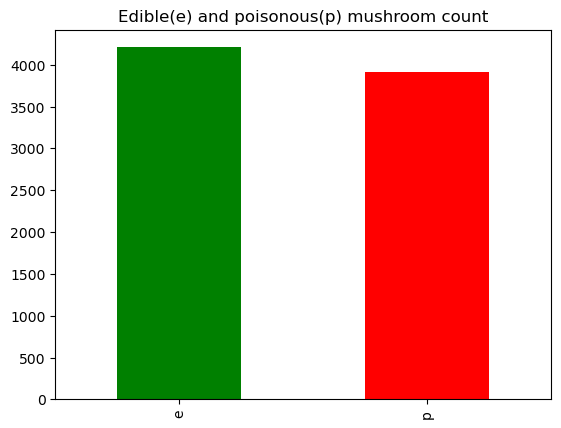

In [365]:
data["class"].value_counts().plot(kind="bar",color=["green","red"]).set(title="Edible(e) and poisonous(p) mushroom count")
plt.show()

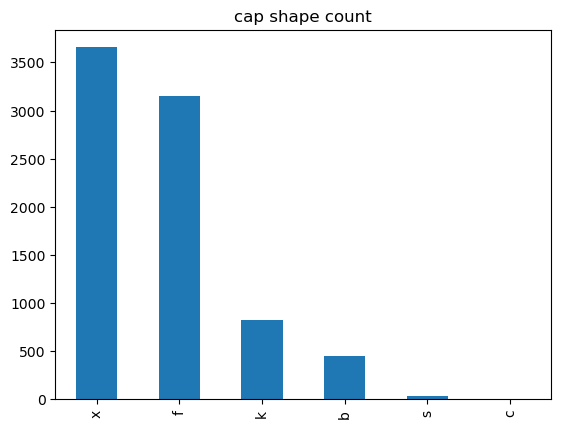

In [366]:
data["cap-shape"].value_counts().plot(kind="bar").set(title="cap shape count")
plt.show()

In [367]:
import plotly.graph_objects as go

capshape = dict(data["cap-shape"].value_counts())

labels = list(capshape.keys())
values = list(capshape.values())

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()


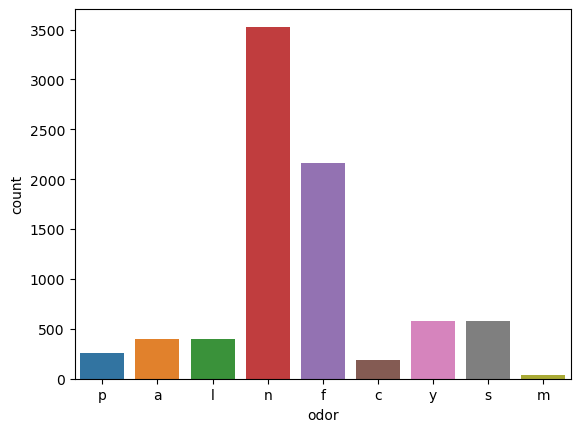

In [368]:
sns.countplot(x=data["odor"],data=data)
plt.show()

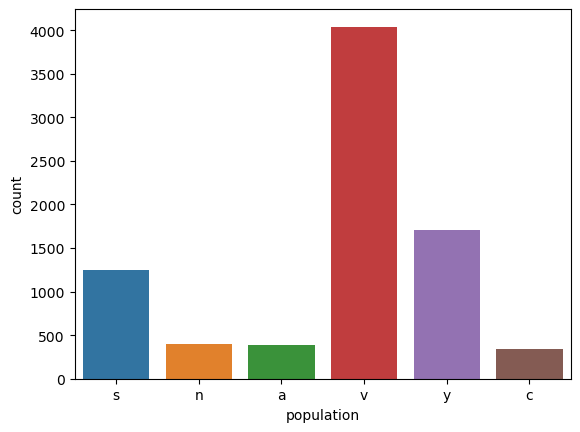

In [369]:
sns.countplot(x=data["population"],data=data)
plt.show()

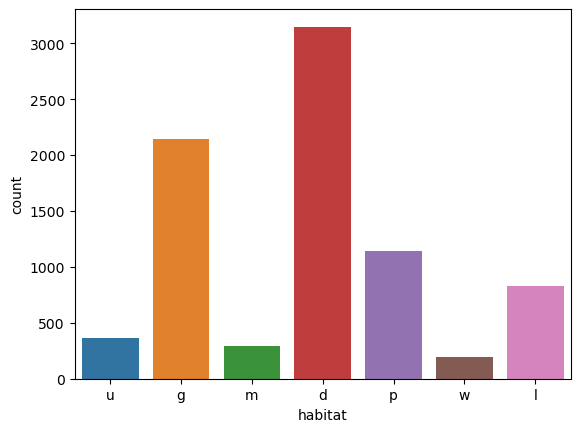

In [370]:
sns.countplot(x=data["habitat"],data=data)
plt.show()

# Bivariant analysis

In [371]:
# # Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

[Text(0.5, 1.0, 'class vs habitat')]

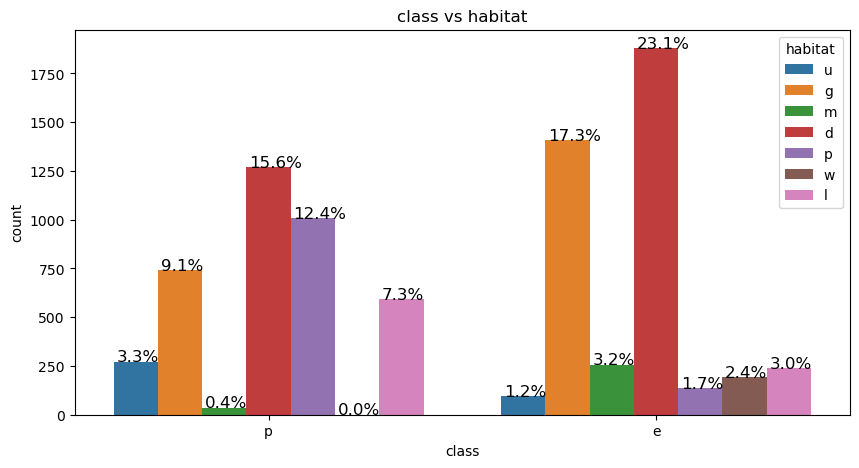

In [372]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='class',hue='habitat',data=data)
bar_perc(ax,data['habitat'])
ax.set(title="class vs habitat")

[Text(0.5, 1.0, 'class vs population')]

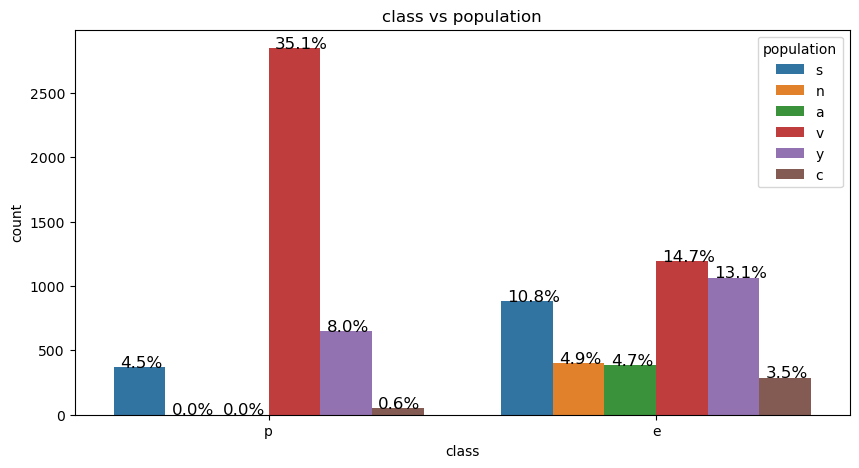

In [373]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=data['class'],hue=data['population'],data=data)
bar_perc(ax,data["population"])
ax.set(title="class vs population")

[Text(0.5, 1.0, 'class vs odor')]

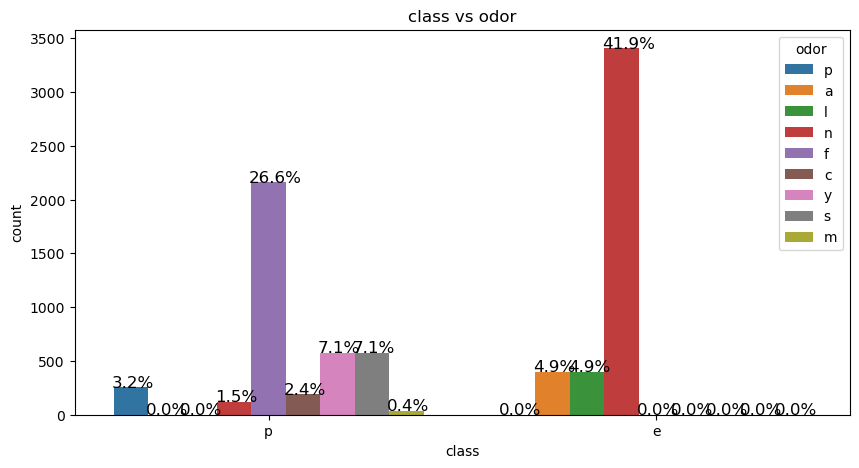

In [374]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=data['class'],hue=data['odor'],data=data)
bar_perc(ax,data["odor"])
ax.set(title="class vs odor")

[Text(0.5, 1.0, 'class vs ring-type')]

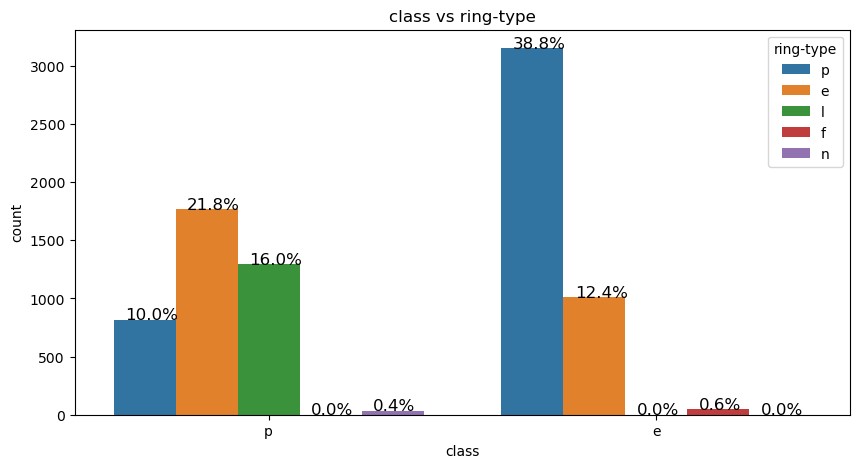

In [375]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=data['class'],hue=data['ring-type'],data=data)
bar_perc(ax,data["ring-type"])
ax.set(title="class vs ring-type")

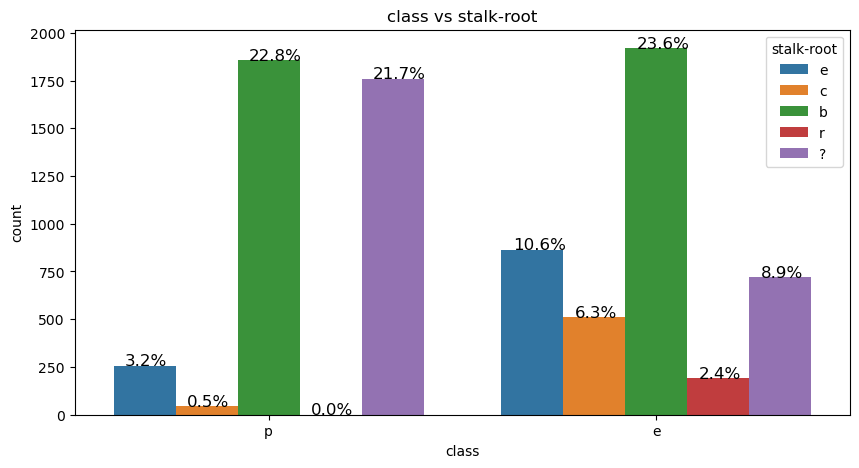

In [376]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=data['class'],hue=data['stalk-root'],data=data)
bar_perc(ax,data["stalk-root"])
ax.set(title="class vs stalk-root")
plt.show()

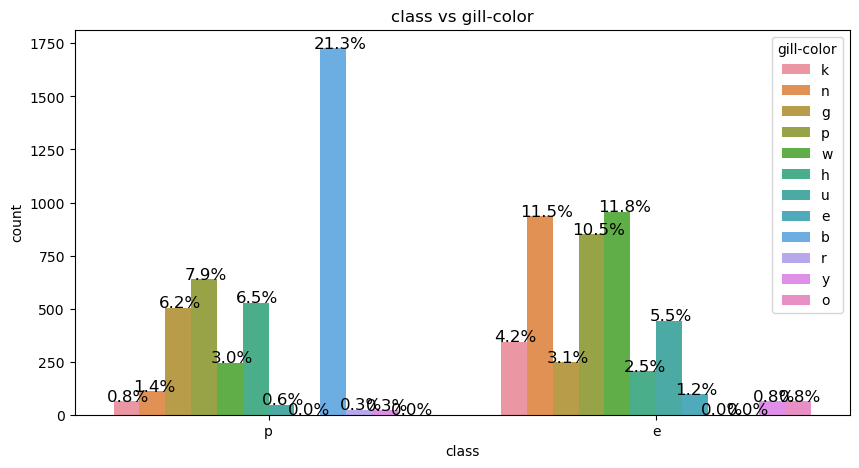

In [377]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=data['class'],hue=data['gill-color'],data=data)
bar_perc(ax,data["gill-color"])
ax.set(title="class vs gill-color")
plt.show()

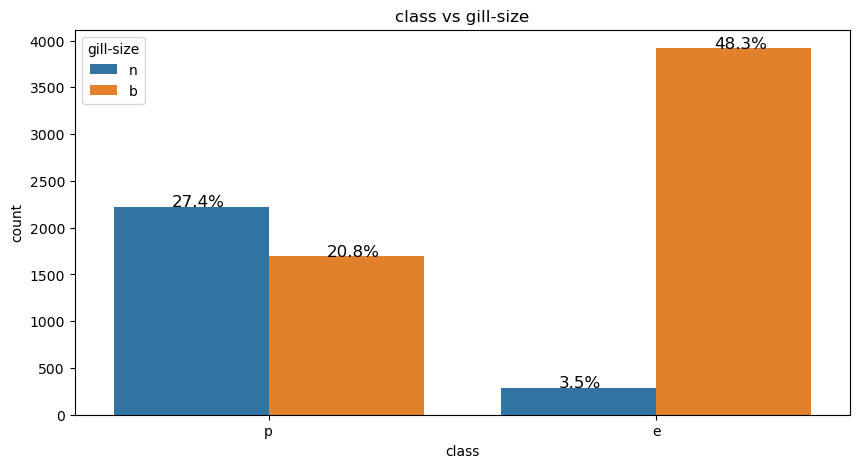

In [378]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=data['class'],hue=data['gill-size'],data=data)
bar_perc(ax,data["gill-size"])
ax.set(title="class vs gill-size")
plt.show()

In [379]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Feature engineering

In [381]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def encoding(df):
    for cols in df.columns:
        df[cols] = le.fit_transform(df[cols])
    return df

encoding(data)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

# Feature scaling

In [383]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# data = data.apply(lambda x:scaler.fit_transform(x))

# data

In [384]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [385]:
correl = data.corr()
correl

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


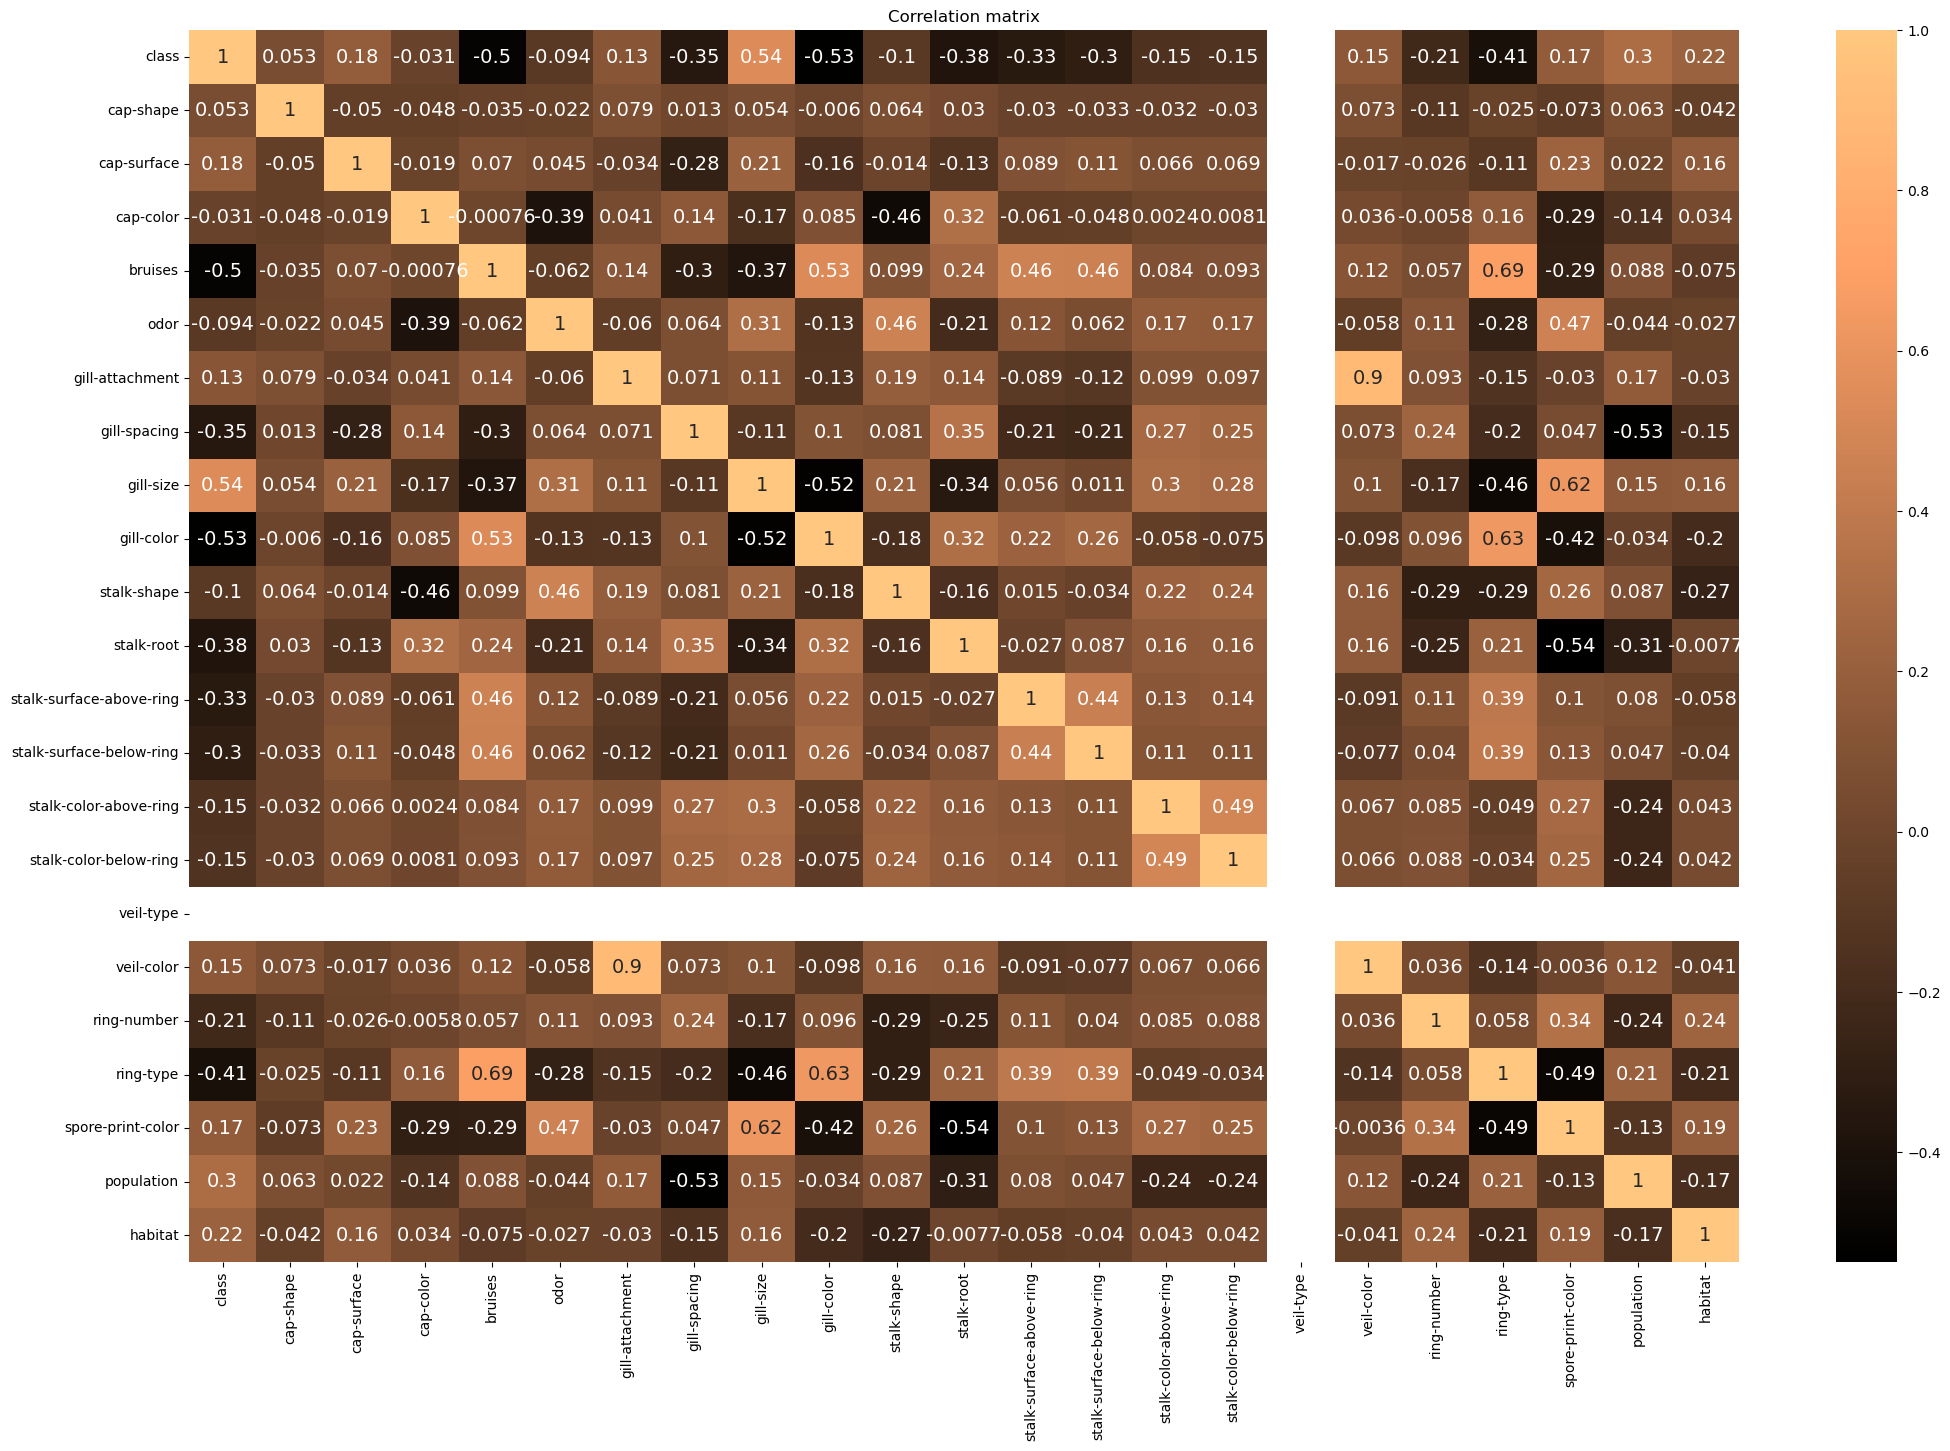

In [386]:
plt.figure(figsize=(25,16))
sns.heatmap(data=correl,annot=True,cmap="copper",cbar=True,annot_kws={"size":14})
plt.title("Correlation matrix")
plt.show()

In [387]:
# sns.pairplot(data)
# plt.show()

# Feature selection

In [388]:
X = data.drop(["class","veil-type"],axis=1)
y = data["class"]

In [389]:
X.shape

(8124, 21)

In [390]:
y.shape

(8124,)

In [391]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=100,stratify=y,shuffle=True)

In [392]:
print(y_train.value_counts(),"\n")
print(y_test.value_counts())

0    3787
1    3524
Name: class, dtype: int64 

0    421
1    392
Name: class, dtype: int64


# Model selection and training

In [393]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)

y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
print("Test accuracy: ",accuracy_score(y_test,y_pred_test))

Training accuracy:  0.9514430310491041
Test accuracy:  0.949569495694957


In [394]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf")
svc.fit(x_train,y_train)

y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
print("Test accuracy: ",accuracy_score(y_test,y_pred_test))

Training accuracy:  0.9927506497059225
Test accuracy:  0.995079950799508


# Best model decision tree ,random forest and KNeighbours

In [395]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred_train = dtc.predict(x_train)
y_pred_test = dtc.predict(x_test)

print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
print("Test accuracy: ",accuracy_score(y_test,y_pred_test))

Training accuracy:  1.0
Test accuracy:  1.0


In [396]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
print("Test accuracy: ",accuracy_score(y_test,y_pred_test))

Training accuracy:  1.0
Test accuracy:  1.0


In [397]:
from sklearn.neighbors import KNeighborsClassifier

#method1-using sqrt of number of training datasets
#Note: choose value of k "odd"
neigh = round(np.sqrt(x_train.shape[0]),3)
print(neigh)

x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

knn1 = KNeighborsClassifier(n_neighbors=85)
knn1.fit(x_train,y_train)

y_pred_train = knn1.predict(x_train)
y_pred_test = knn1.predict(x_test)

print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
print("Test accuracy: ",accuracy_score(y_test,y_pred_test))

85.504
Training accuracy:  0.960333743673916
Test accuracy:  0.959409594095941


In [398]:
#Method2-finding n_neighbours value calculating accuracy and error
from sklearn.metrics import mean_squared_error

train_accuracy = []
test_accuracy = []
train_rmse_value = []
test_rmse_value = []
train_mse_value = []
test_mse_value = []

for neigh in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors=neigh)
    knn2.fit(x_train,y_train)
    
    y_pred_train = knn2.predict(x_train)
    y_pred_test = knn2.predict(x_test)
    
    accuracy_train = round(accuracy_score(y_train,y_pred_train),5)
    accuracy_test = round(accuracy_score(y_test,y_pred_test),5)
    
        
    rmse_train = round(np.sqrt(mean_squared_error(y_train,y_pred_train)),5)
    rmse_test = round(np.sqrt(mean_squared_error(y_test,y_pred_test)),5)
    
    mse_train = round(mean_squared_error(y_train,y_pred_train),5)
    mse_test = round(mean_squared_error(y_test,y_pred_test),5)
    
    train_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)
    
    train_rmse_value.append(rmse_train)
    test_rmse_value.append(rmse_test)
    
       
    train_mse_value.append(mse_train)
    test_mse_value.append(mse_test)

In [399]:
print(train_accuracy)
print("\n",test_accuracy)
print("\n",train_rmse_value)
print("\n",test_rmse_value)
print("\n",train_rmse_value)
print("\n",test_rmse_value)

[1.0, 1.0, 1.0, 0.99973, 0.99973, 0.99932, 0.99959, 0.99945, 0.99959, 0.99932, 0.99904, 0.99863, 0.99795, 0.99713, 0.9974, 0.99549, 0.99576, 0.99535, 0.99549, 0.99467, 0.9948, 0.99412, 0.99426, 0.99426, 0.99426, 0.99343, 0.99357, 0.99207, 0.99261]

 [1.0, 0.99754, 0.99754, 0.99754, 0.99754, 0.99754, 0.99754, 0.99754, 0.99754, 0.99754, 0.99754, 0.99631, 0.99631, 0.99631, 0.99754, 0.99508, 0.99508, 0.99262, 0.99631, 0.99262, 0.99262, 0.99139, 0.99139, 0.99139, 0.99139, 0.99139, 0.99139, 0.99139, 0.99139]

 [0.0, 0.0, 0.0, 0.01654, 0.01654, 0.02615, 0.02026, 0.02339, 0.02026, 0.02615, 0.03094, 0.03698, 0.0453, 0.05359, 0.05098, 0.06718, 0.06512, 0.06819, 0.06718, 0.07304, 0.07209, 0.07669, 0.07579, 0.07579, 0.07579, 0.08103, 0.08018, 0.08907, 0.08594]

 [0.0, 0.0496, 0.0496, 0.0496, 0.0496, 0.0496, 0.0496, 0.0496, 0.0496, 0.0496, 0.0496, 0.06075, 0.06075, 0.06075, 0.0496, 0.07014, 0.07014, 0.08591, 0.06075, 0.08591, 0.08591, 0.09279, 0.09279, 0.09279, 0.09279, 0.09279, 0.09279, 0.09279, 0

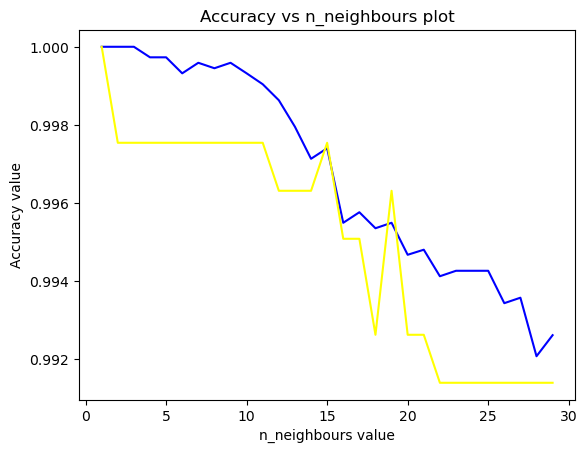

In [400]:
plt.plot(list(range(1,30)),train_accuracy,color="b")
plt.plot(list(range(1,30)),test_accuracy,color="yellow")
plt.xlabel("n_neighbours value")
plt.ylabel("Accuracy value")
plt.title("Accuracy vs n_neighbours plot")
plt.show()

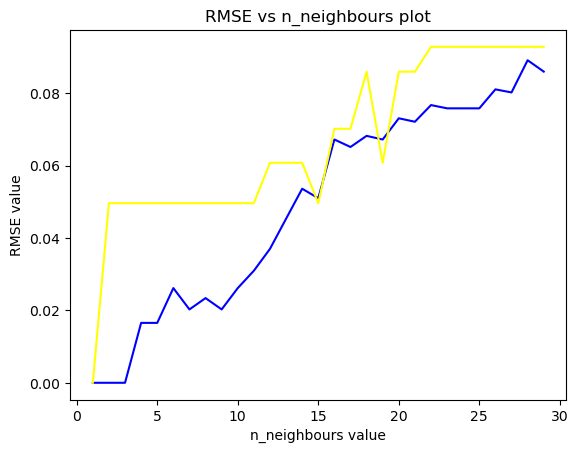

In [401]:
plt.plot(list(range(1,30)),train_rmse_value,color="b")
plt.plot(list(range(1,30)),test_rmse_value,color="yellow")
plt.xlabel("n_neighbours value")
plt.ylabel("RMSE value")
plt.title("RMSE vs n_neighbours plot")
plt.show()

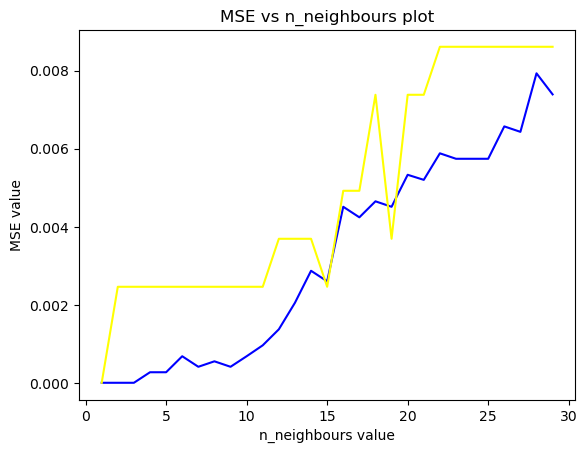

In [402]:
plt.plot(list(range(1,30)),train_mse_value,color="b")
plt.plot(list(range(1,30)),test_mse_value,color="yellow")
plt.xlabel("n_neighbours value")
plt.ylabel("MSE value")
plt.title("MSE vs n_neighbours plot")
plt.show()

In [403]:
from sklearn.neighbors import KNeighborsClassifier


knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(x_train,y_train)

y_pred_train = knn2.predict(x_train)
y_pred_test = knn2.predict(x_test)

print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
print("Test accuracy: ",accuracy_score(y_test,y_pred_test))

Training accuracy:  1.0
Test accuracy:  1.0


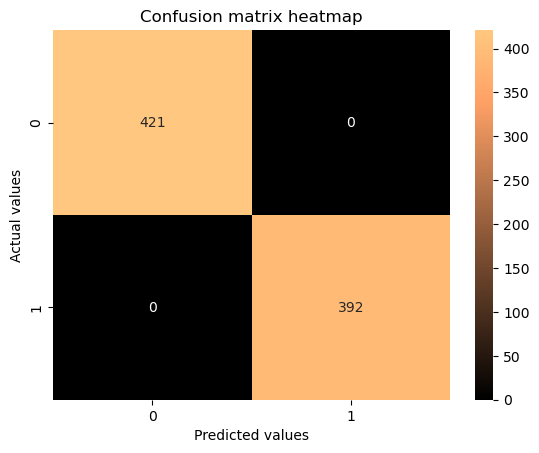

In [404]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred_test = knn2.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data=conf_matrix,cmap="copper",annot=True,fmt=".3g",)
plt.title("Confusion matrix heatmap")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [405]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       1.00      1.00      1.00       392

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

